In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import keras

Using TensorFlow backend.


In [4]:
keras.backend.backend()

'tensorflow'

In [5]:
from keras.datasets import mnist

In [6]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [14]:
y_train[:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Image PLotting

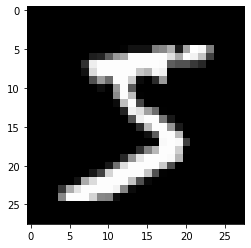

In [15]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

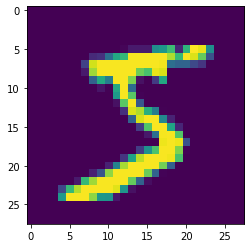

In [16]:
plt.imshow(X_train[0])

In [17]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [20]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Model Applying

1 . reducw the dataset for fat compiling 

In [21]:
X_train = X_train[:3600]
X_test = X_test[:900]
y_train = y_train[:3600]
y_test = y_test[:900]

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3600, 28, 28, 1) (3600, 10)
(900, 28, 28, 1) (900, 10)


# BUilding Keras MOdel 

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [24]:
model = Sequential()

model.add(Flatten(input_shape = (28,28,1)))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)               

# Compile Model

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         batch_size=16,
         verbose=2,
         epochs=12)

Train on 3600 samples, validate on 900 samples
Epoch 1/12
 - 1s - loss: 8.9566 - accuracy: 0.7189 - val_loss: 3.5521 - val_accuracy: 0.7911
Epoch 2/12
 - 1s - loss: 1.7701 - accuracy: 0.8653 - val_loss: 2.9704 - val_accuracy: 0.8178
Epoch 3/12
 - 1s - loss: 0.9325 - accuracy: 0.9192 - val_loss: 2.3190 - val_accuracy: 0.8522
Epoch 4/12
 - 1s - loss: 0.5317 - accuracy: 0.9444 - val_loss: 2.1853 - val_accuracy: 0.8544
Epoch 5/12
 - 1s - loss: 0.5919 - accuracy: 0.9386 - val_loss: 2.4670 - val_accuracy: 0.8178
Epoch 6/12
 - 1s - loss: 0.5470 - accuracy: 0.9458 - val_loss: 2.0421 - val_accuracy: 0.8633
Epoch 7/12
 - 1s - loss: 0.4788 - accuracy: 0.9494 - val_loss: 2.5791 - val_accuracy: 0.8667
Epoch 8/12
 - 1s - loss: 0.6072 - accuracy: 0.9503 - val_loss: 2.2242 - val_accuracy: 0.8867
Epoch 9/12
 - 1s - loss: 0.5408 - accuracy: 0.9511 - val_loss: 2.3098 - val_accuracy: 0.8622
Epoch 10/12
 - 1s - loss: 0.4675 - accuracy: 0.9558 - val_loss: 2.2419 - val_accuracy: 0.8767
Epoch 11/12
 - 1s - lo

for improve the accuracy try this model with differ value of dense 